In [28]:
import os
import pandas as pd
import pdb
import time

cnt = 0
#score = 0.0

path = '/home/kai/data/shiyi/stacking/StackPreds/TopN_XGB/'

xgb_topn_repo = {}

for item in os.listdir(path):
    #pdb.set_trace()
    #score += float(item.split('_')[-1])
    tmp = pd.read_csv(path+item)
    xgb_topn_repo[item] = tmp
    if cnt == 0:
        preds = tmp
        label_cols = list(preds.columns)
        label_cols.pop(0) # remove 'id'
    else:
        preds[label_cols] += tmp[label_cols]
    cnt += 1

print(cnt)
preds[label_cols] = preds[label_cols].applymap(lambda x: x/cnt)

20


In [37]:
label_cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [29]:
preds.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.998675,0.339448,0.987655,0.049094,0.953819,0.420344
1,0000247867823ef7,0.000365,0.010132,0.000595,0.000509,0.000509,0.000594
2,00013b17ad220c46,0.001733,0.010132,0.000633,0.000511,0.000536,0.000596
3,00017563c3f7919a,0.000294,0.010129,0.000591,0.000532,0.000500,0.000594
4,00017695ad8997eb,0.000703,0.010129,0.000592,0.000511,0.000525,0.000594


In [31]:
preds.to_csv(path+'xgb_ensemble_top{}_{}.csv.gz'.format(cnt, int(time.time())), index=False, compression='gzip')

In [24]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import numpy as np

preds_mats = []
names = []
for label in label_cols:
    preds_list = []
    print(label)
    for key, value in xgb_topn_repo.items():
        if key not in names:
            names.append(key)
        preds_list.append(value[label].values.reshape(-1,1))
    preds_mats.append(np.hstack(preds_list))
    
assert len(preds_mats) == len(label_cols)
assert preds_mats[0].shape[1] == len(xgb_topn_repo)

toxic
severe_toxic
obscene
threat
insult
identity_hate


In [26]:
# analyze the first label in scatter matrix
temp = pd.DataFrame(preds_mats[0], columns=names)
print(temp.head(3))

   xgb_topn_1519890027.csv  xgb_topn_1519891076.csv  xgb_topn_1519890993.csv
0                 0.997695                 0.999069                 0.997616
1                 0.000799                 0.000138                 0.001633
2                 0.001974                 0.001661                 0.002469


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08f5227d30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f08f5613898>]], dtype=object)

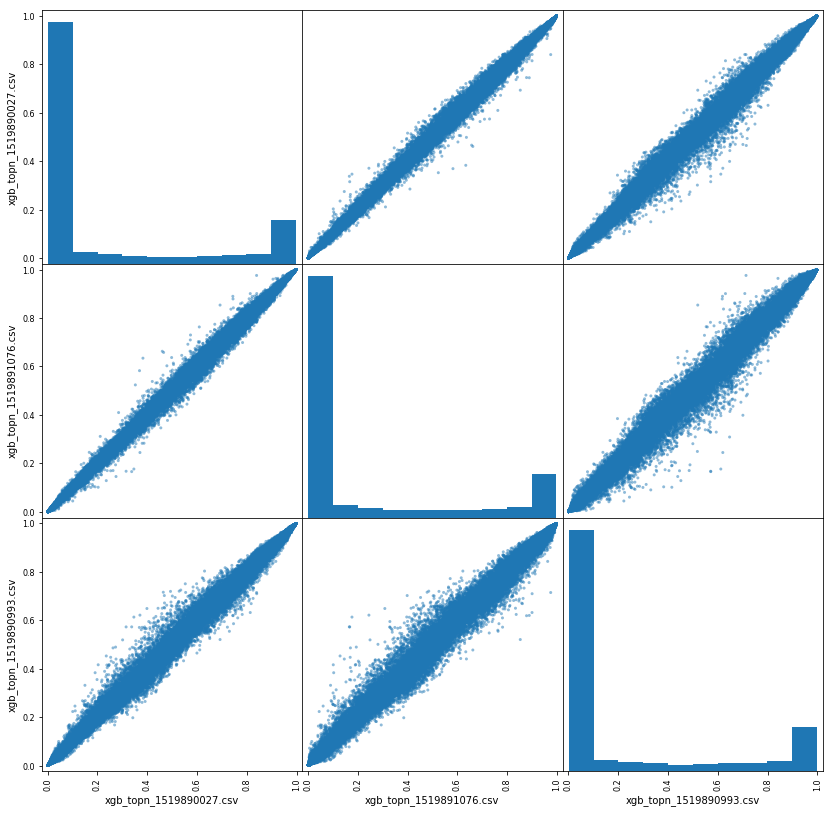

In [27]:
scatter_matrix(temp, figsize=(14,14))